# Overlap matrix analysis

In this notebook we will analyse the phase space overlap between two sets of simulations to understand what is a good phase space overlap matrix and a bad one, using Sire tool `analyse_freenrg mbar`.

The notebook forms part of the CCPBio-Sim workshop **Alchemical Free Energy Simulation Analysis with analyse_freenrg** run on the 11th of April 2018 at the University of Bristol.

*Author: Anotnia Mey & Stefano Bosisio  
Email: antonia.mey@ed.ac.uk*

**Reading time of the document: xx mins**

## Let's start with the necessary imports

In [2]:
%pylab inline
import glob
import seaborn as sbn
sbn.set_style("ticks")
sbn.set_context("notebook", font_scale = 2)

Populating the interactive namespace from numpy and matplotlib


### The overlap matrix

can be used to look at the phase space overlap of neighbouring lambdas. By adding the flag `--overlap` this matrix will be automatically computed and added to the output file. 
So let's look at the overlap matrix for a simulation of a host-guest system in the bound phase, obtained by running 16 $\lambda$ windows of 8 ns length each. 
This time we will write an output file called `good_overlap.dat`

In [3]:
%%capture run_info_good
#Let's run the analysis again with the keyword --overlap
!~/sire_2018/sire.app/bin/analyse_freenrg mbar -i good_overlap/lambda-*/simfile.dat -o good_overlap.dat --subsampling --overlap

In [5]:
#A helper function to read the overlap matrix from file
def get_overlp_matrix(filename,lambda_vals):
    fh = open (filename, 'r')
    lines = fh.readlines()
    fh.close()
    count = 0
    matrix = []
    for line in lines:
        if line.startswith('#Overlap'):
            matrix = lines[(count+1):(count+1+lambda_vals)]
            break
        count = count+1 
    for i in range(len(matrix)):
        temp = matrix[i].strip().split(' ')
        float_temp = [float(j) for j in temp]
        matrix[i] = float_temp
    matrix =np.array(matrix)
    return matrix

In [6]:
#an exercise could be add the lambda_vals in the function above
good_overlap = get_overlp_matrix('good_overlap.dat',16)


### Plotting the overlap matrix
The plotting library has a nice advanced heat map feature that allows you to not only plot a pictorial image of a matrix or heatmap but also add the numercal values making it easier to read the plot

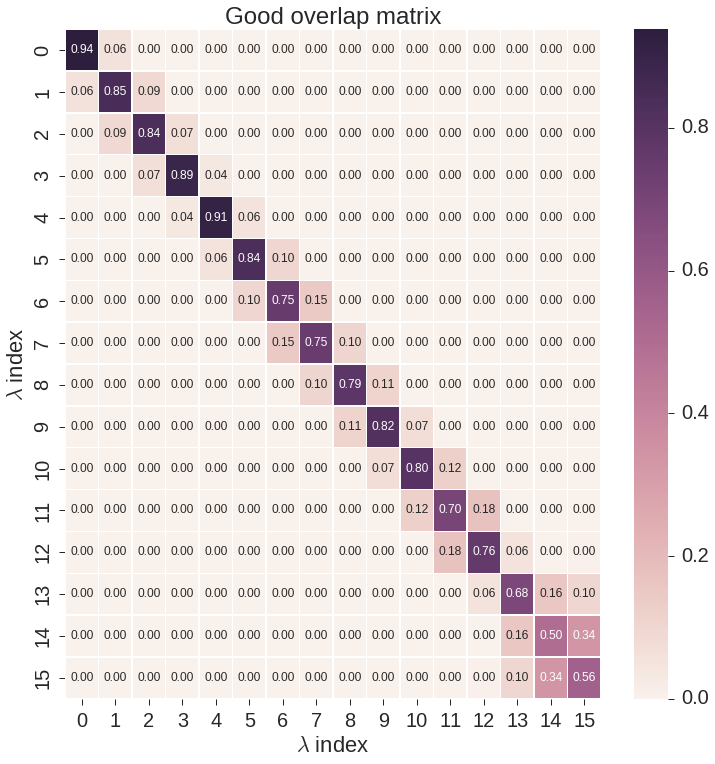

In [7]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(good_overlap, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Good overlap matrix')

### Example of a bad overlap matrix
Below we have the same simulation as before, but reducing the number of lambda windows from 11 to 6. What do you observe in terms of the overlap matrix?

Belowe we have the same simulation as before, but the number of $\lambda$ windows was reduced from 16 to 10. What do you observe in terms of the overlap matrix? 
Repeat the procedure above and create a file called `bad_overlap.dat`

In [8]:
%%capture run_info_bad
#Let's run the analysis again with the keyword --overlap


In [ ]:
bad_overlap = get_overlp_matrix('bad_overlap.dat',10)

In [ ]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(good_overlap, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Bad overlap matrix')

### Advanced tasks
Compare your estimate using less data. `analyse_freenrg mbar` has the option `--discard`. This will run your analysis with a number of frames discarded from the start of the simulation. 

Advanced tasks:
1. Rerun the analysis discarding 1000 frames from the start writing out a new free.dat and vacuum.dat file. 
2. Compute the relative free energy of hydration from the new analysis. How does the value differe from your original estimate? Does is compare better or worse to the experimental value?
3. Plot the PMF of the original analysis and the one with the initial 1000 frames discarded for the simulations in solution. What do you observe?
4. Explore the various plots and overlaps for the vacuum simulation as well. 

In [ ]:
#Rerun with discarding 1000 frames form the vacuum simulation here:



In [ ]:
#Rerun with discarding 1000 frames form the solution simulation here:



In [ ]:
#Compute the hydration free energy from this new estimate:



In [ ]:
#Plot the PMF of the MBAR analysis of the original analysis in comparison to the 
#MBAR analysis where the first 1000 frames were discarded. 




Congratulations you have finished this tutorial! Time for a coffee or tea break :-)